## Project: Water sustainabilty
## Team Members: Kishor Desai and Puneeth H S


## Data Pre-processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('./data.csv')

In [ ]:
print(df.shape)
print(df.columns)

(160, 17)
Index(['Sources of water supply for your community',
       'If you don't get water from tankers, what do you rely on for water needs?',
       'How much do you pay for a single tanker of water?',
       'What is the capacity of the tanker in litres?', 'Your area Pincode',
       'Type of Community', 'Frequency of purchase of private water tanker',
       'How many private tankers do you get per month on average?',
       'Number of units in the community', 'Do you have water rationing?',
       'Do you use treated STP water for flushing/gardening? ',
       'What is your community's monthly expense on water?',
       'Number of dry days in the past year?',
       'Have you been ordering private water tankers more often in the last three months? ',
       'Has the supply of water from BWSSB changed during the last one year (both in terms of frequency as well as quantity)? ',
       'How much were you paying for the same tanker of water a year back (Feb 2023)?',
       'How of

In [ ]:
df.sample()

,Sources of water supply for your community,"If you don't get water from tankers, what do you rely on for water needs?",How much do you pay for a single tanker of water?,What is the capacity of the tanker in litres?,Your area Pincode,Type of Community,Frequency of purchase of private water tanker,How many private tankers do you get per month on average?,Number of units in the community,Do you have water rationing?,Do you use treated STP water for flushing/gardening?,What is your community's monthly expense on water?,Number of dry days in the past year?,Have you been ordering private water tankers more often in the last three months?,Has the supply of water from BWSSB changed during the last one year (both in terms of frequency as well as quantity)?,How much were you paying for the same tanker of water a year back (Feb 2023)?,How often does your water tanker vendor raise rates?
3,"Private water tankers, BWSSB/Municipal/Cauvery...",NaN,500,6000,560023,Apartments,Daily,350,356,No,NaN,175000,Nil,More often,Reduced,400.0,Annually


In [ ]:
print(df.isna().sum()/len(df)*100)

Sources of water supply for your community                                                                                  0.000
If you don't get water from tankers, what do you rely on for water needs?                                                 100.000
How much do you pay for a single tanker of water?                                                                           0.000
What is the capacity of the tanker in litres?                                                                               0.000
Your area Pincode                                                                                                           0.000
Type of Community                                                                                                           0.000
Frequency of purchase of private water tanker                                                                               0.000
How many private tankers do you get per month on average?                                 

In [ ]:
df.drop(columns=["If you don't get water from tankers, what do you rely on for water needs?","Do you use treated STP water for flushing/gardening? "],inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isna().sum()/len(df)*100)

Sources of water supply for your community                                                                                0.0
How much do you pay for a single tanker of water?                                                                         0.0
What is the capacity of the tanker in litres?                                                                             0.0
Your area Pincode                                                                                                         0.0
Type of Community                                                                                                         0.0
Frequency of purchase of private water tanker                                                                             0.0
How many private tankers do you get per month on average?                                                                 0.0
Number of units in the community                                                                                      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 1 to 159
Data columns (total 15 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   Sources of water supply for your community                                                                              102 non-null    object 
 1   How much do you pay for a single tanker of water?                                                                       102 non-null    int64  
 2   What is the capacity of the tanker in litres?                                                                           102 non-null    int64  
 3   Your area Pincode                                                                                                       102 non-null    int64  
 4   T

In [ ]:
for column in df.columns:
    if df[column].dtype=='object':
        print(f"Column = {column}\n\tUnique entries = {df[column].unique().tolist()}")

Column = Sources of water supply for your community
	Unique entries = ['Private water tankers, Borewell', 'Private water tankers, BWSSB/Municipal/Cauvery Water, Borewell, STP treated water', 'Private water tankers, BWSSB/Municipal/Cauvery Water, Borewell', 'Private water tankers, BWSSB/Municipal/Cauvery Water, STP treated water', 'BWSSB/Municipal/Cauvery Water, Borewell', 'Private water tankers, Borewell, STP treated water', 'Private water tankers', 'Private water tankers, Borewell, STP treated water, Rain water harvesting', 'Private water tankers, STP treated water', 'Private water tankers, BWSSB/Municipal/Cauvery Water', 'Borewell', 'BWSSB/Municipal/Cauvery Water']
Column = Type of Community
	Unique entries = ['Apartments', 'Villas', 'Individual Houses']
Column = Frequency of purchase of private water tanker
	Unique entries = ['Daily', 'Weekly', 'Only for Emergency']
Column = Number of units in the community
	Unique entries = ['30', '120', '356', '703', '32', '83', '819', '125', '108

In [ ]:
df.drop(columns=["Sources of water supply for your community","Number of dry days in the past year?","Have you been ordering private water tankers more often in the last three months? ","Has the supply of water from BWSSB changed during the last one year (both in terms of frequency as well as quantity)? ","How often does your water tanker vendor raise rates?"],inplace=True)

In [ ]:
df.replace('65 house ','65',inplace=True)
df.replace('Yes','1',inplace=True)
df.replace('No','0',inplace=True)
df.replace('2,50,000','250000',inplace=True)
df.replace('12,00,000 ltrs','1200000',inplace=True)

In [ ]:
df=df.astype({"Number of units in the community":int,"Do you have water rationing?":int,"What is your community's monthly expense on water?":int})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 1 to 159
Data columns (total 10 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   How much do you pay for a single tanker of water?                              102 non-null    int64  
 1   What is the capacity of the tanker in litres?                                  102 non-null    int64  
 2   Your area Pincode                                                              102 non-null    int64  
 3   Type of Community                                                              102 non-null    object 
 4   Frequency of purchase of private water tanker                                  102 non-null    object 
 5   How many private tankers do you get per month on average?                      102 non-null    int64  
 6   Number of units in the communit

<Axes: >

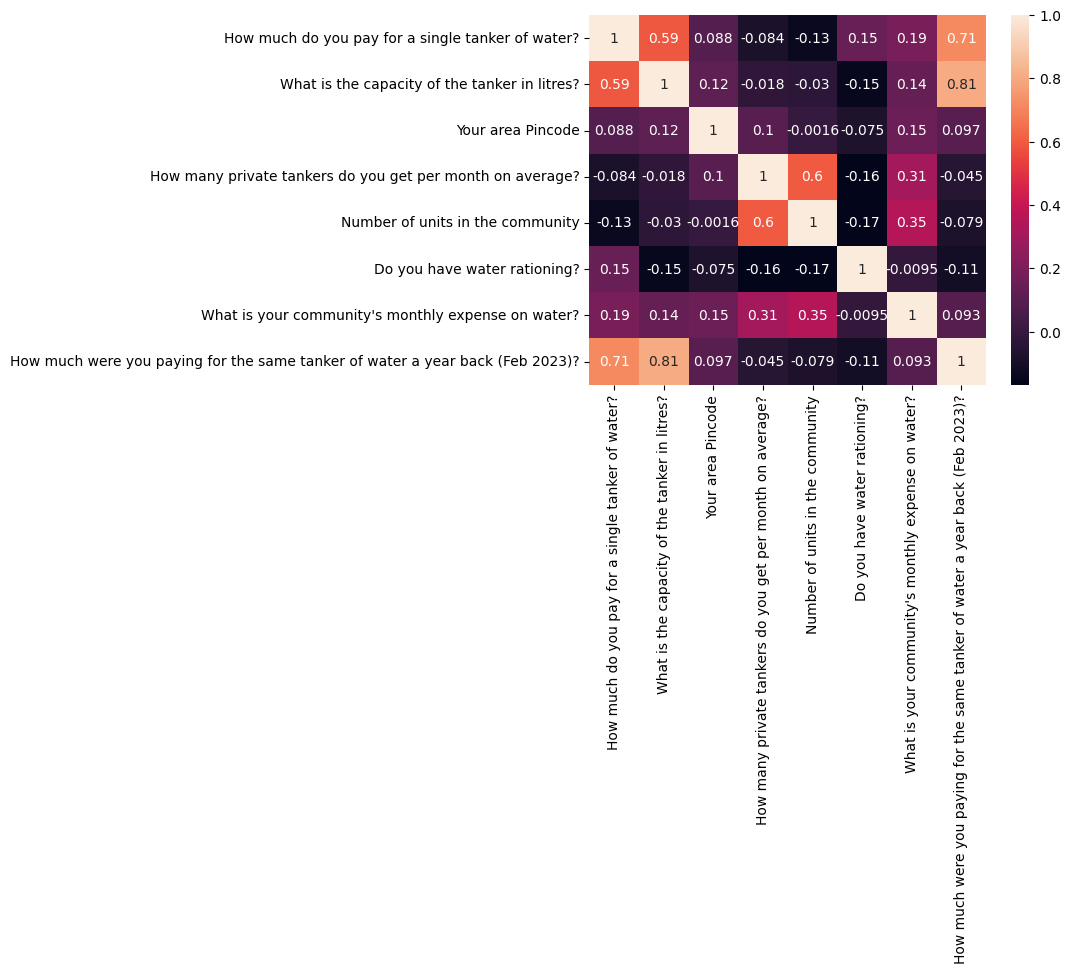

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Linear Regression model

In [ ]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=['Type of Community', 'Frequency of purchase of private water tanker'])

In [ ]:
print(df.sample())

     How much do you pay for a single tanker of water?  \
144                                               1600   

     What is the capacity of the tanker in litres?  Your area Pincode  \
144                                           6000             560103   

     How many private tankers do you get per month on average?  \
144                                                 90           

     Number of units in the community  Do you have water rationing?  \
144                                60                             0   

     What is your community's monthly expense on water?  \
144                                             120000    

     How much were you paying for the same tanker of water a year back (Feb 2023)?  \
144                                             1200.0                               

     Type of Community_Apartments  Type of Community_Individual Houses  \
144                          True                                False   

     Type of Commun

In [ ]:
X = df.drop(columns=['How much do you pay for a single tanker of water?'])
y = df['How much do you pay for a single tanker of water?']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 188214.52880098842
R^2 Score: 0.36108000873494817


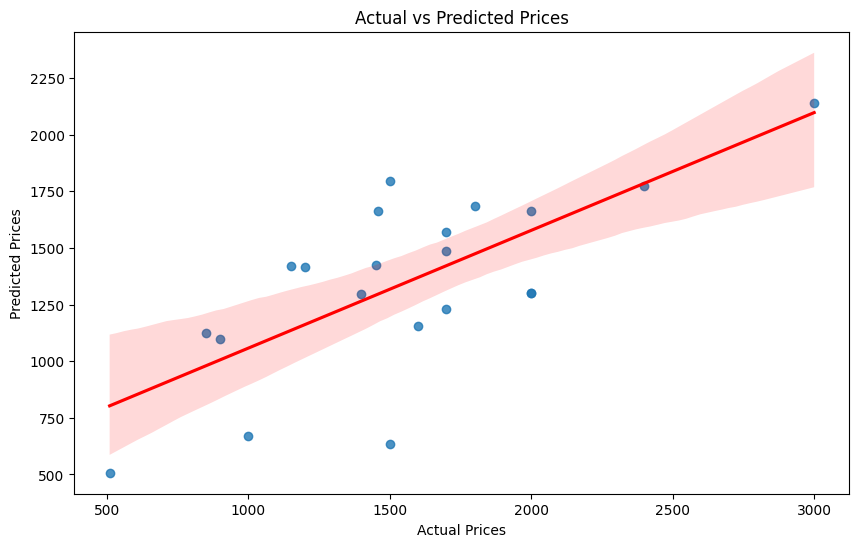

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

## Random forest regressor model

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

Random Forest - Mean Squared Error: 202581.16547619045
Random Forest - R^2 Score: 0.3123104932384374


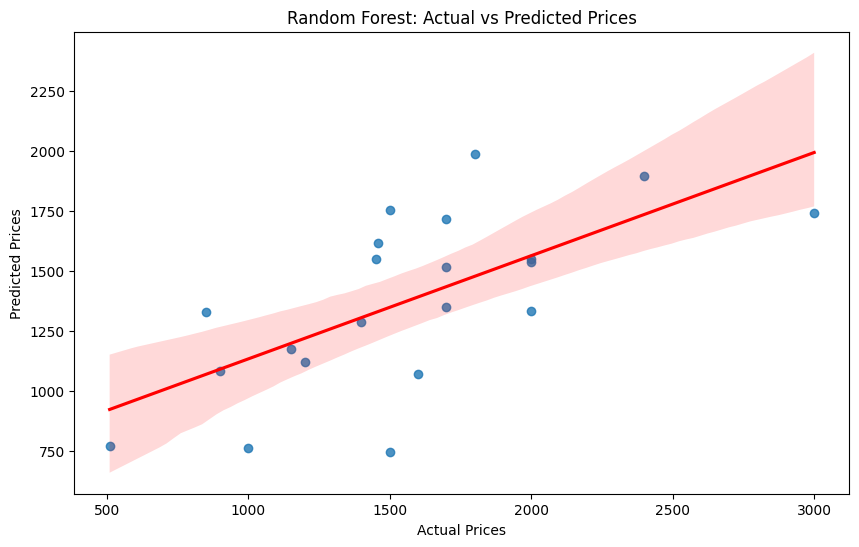

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_rf, line_kws={"color": "red"})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()